In [306]:
import pandas as pd

In [307]:
x_estudo = 9.1
y_estudo = 11.0
estudo = [[9.1, 11.0]]
data = [["Atribute 1", "Atribute 2", "Class"],
[0.8,6.3,'N'],
[1.4,8.1,'N'],
[2.1,7.4,'N'],
[2.6,14.3,'P'],
[6.8,12.6,'N'],
[8.8,9.8,'P'],
[9.2,11.6,'N'],  
[10.8,9.6,'P'],
[11.8,9.9,'P'],
[12.4,6.5,'P'],
[12.8,1.1,'N'],
[14.0,19.9,'N'],
[14.2,18.5,'N'],
[15.6,17.4,'N'],
[15.8,12.2,'N'],
[16.6,6.7,'P'],
[17.4,4.5,'P'],
[18.2,6.9,'P'],
[19.0,3.4,'N'],
[19.6,11.1,'P']]
column_names = data.pop(0)
df = pd.DataFrame(data, columns=column_names)
df.head()

,Atribute 1,Atribute 2,Class
0,0.8,6.3,N
1,1.4,8.1,N
2,2.1,7.4,N
3,2.6,14.3,P
4,6.8,12.6,N


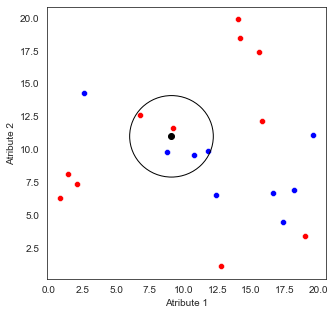

In [308]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(5, 5))

# Pontos Negativos
g = sns.scatterplot(x="Atribute 1", y="Atribute 2",
                    data=df.where(df['Class'] == "N"), color='red')

# Pontos Positivos
g = sns.scatterplot(x="Atribute 1", y="Atribute 2",
                    data=df.where(df['Class'] == "P"), color='blue')

# Ponto de Estudo
g.scatter(x_estudo, y_estudo, c='black')

# Circulo para os 5 vizinhos mais próximos
circle = plt.Circle((x_estudo, y_estudo), 3.1, color='black', fill=False)
g.add_patch(circle)
plt.show()

In [309]:
# Recortamos as colunas que contém os valores para calculo da distância euclidiana
X = df.iloc[:, :-1].values

# Recortamos as colunas que contém os resultados
y = df.iloc[:, 2].values

In [345]:
# Criamos nosso datset modelo 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [346]:
# Escalamos o modelo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [347]:
# Classificamos o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [348]:
# Testamos a amostra criada anteriormente
y_pred = classifier.predict(X_test)

In [350]:
# Criamos a matriz de confusão para avaliar o modelo, podemos ver que temos precisão de 100%, logo podemos utilizar o modelo
# com muitas ressalvas, claro, devido termos só 10% do dataset testado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           N       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [351]:
# Utilizamos o modelo para predizer o valor de estudo
h_pred = classifier.predict(estudo)

In [352]:
# Valor corresponde a 'N' ou seja, negativo, pelo gráfico acima conseguimos ver claramente que seria negativo
print(h_pred)

['N']


In [353]:
# Para possível modelagem, transformamos os resultados em dataset
df_pred = pd.DataFrame(estudo, columns = ['Atribute 1','Atribute 2'])
pred = pd.Series(h_pred)
df_pred['Class'] = pred.values

In [354]:
df_pred.head(7)

,Atribute 1,Atribute 2,Class
0,9.1,11.0,N
